In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
from collections import Counter
import requests

with requests.get(
    "https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv") as r, open("features.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)

with requests.get(
    "https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv") as r, open("target.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)

In [3]:
df_features = pd.read_csv("features.csv")

df_target = pd.read_csv("target.csv")

/home/facundo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = df_features.merge(df_target, left_on='id', right_on='id')

In [5]:
df.head()

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,llovieron_hamburguesas_al_dia_siguiente
0,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,86942,no,16.0,...,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,no
1,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,102098,no,2.6,...,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,no
2,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,67154,no,2.4,...,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,no
3,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,50245,no,NaN,...,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,no
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,82904,no,0.8,...,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,no


In [6]:
df.isnull()


,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,llovieron_hamburguesas_al_dia_siguiente
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116365,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
116366,False,False,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.dtypes

barrio                                      object
dia                                         object
direccion_viento_tarde                      object
direccion_viento_temprano                   object
horas_de_sol                               float64
humedad_tarde                              float64
humedad_temprano                           float64
id                                           int64
llovieron_hamburguesas_hoy                  object
mm_evaporados_agua                         float64
mm_lluvia_dia                              float64
nubosidad_tarde                            float64
nubosidad_temprano                         float64
presion_atmosferica_tarde                   object
presion_atmosferica_temprano               float64
rafaga_viento_max_direccion                 object
rafaga_viento_max_velocidad                float64
temp_max                                   float64
temp_min                                   float64
temperatura_tarde              

In [8]:
df['presion_atmosferica_tarde'] = pd.to_numeric(df['presion_atmosferica_tarde'],errors='coerce')

In [9]:
df.dtypes

barrio                                      object
dia                                         object
direccion_viento_tarde                      object
direccion_viento_temprano                   object
horas_de_sol                               float64
humedad_tarde                              float64
humedad_temprano                           float64
id                                           int64
llovieron_hamburguesas_hoy                  object
mm_evaporados_agua                         float64
mm_lluvia_dia                              float64
nubosidad_tarde                            float64
nubosidad_temprano                         float64
presion_atmosferica_tarde                  float64
presion_atmosferica_temprano               float64
rafaga_viento_max_direccion                 object
rafaga_viento_max_velocidad                float64
temp_max                                   float64
temp_min                                   float64
temperatura_tarde              

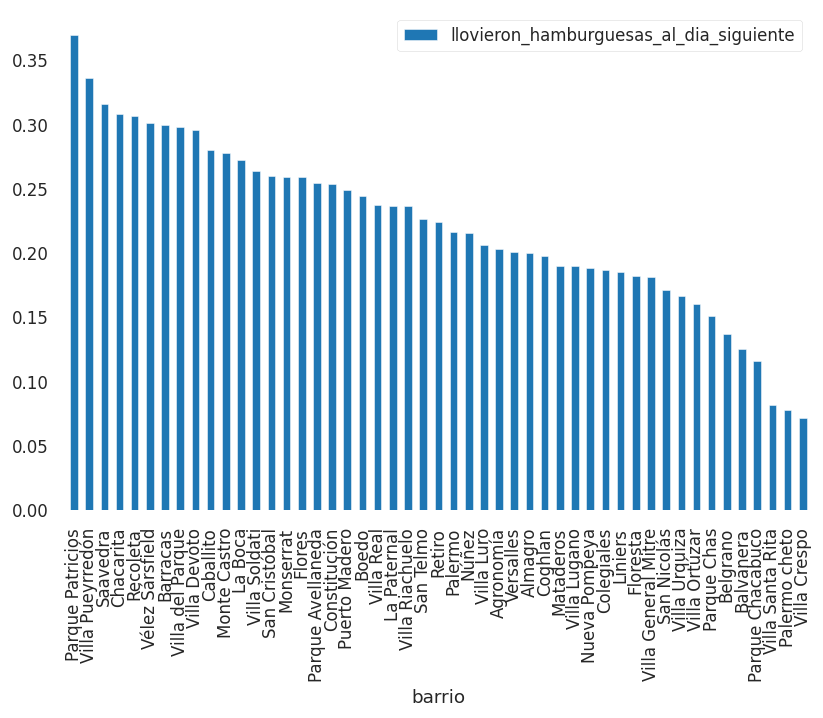

In [10]:
plt.rcParams["figure.dpi"] = 120
lluvia_por_barrios = df[['barrio', 'llovieron_hamburguesas_al_dia_siguiente']][df['llovieron_hamburguesas_al_dia_siguiente']=='si'].groupby('barrio').count()

lluvia_por_barrios /=  df[['barrio', 'llovieron_hamburguesas_al_dia_siguiente']].groupby('barrio').count()

lluvia_por_barrios.sort_values(by = 'llovieron_hamburguesas_al_dia_siguiente', ascending=False).plot(kind = 'bar')

plt.show()

In [32]:
df['llovieron_hamburguesas_al_dia_siguiente'].value_counts(dropna=False, normalize = True)


no     0.758645
si     0.218677
NaN    0.022678
Name: llovieron_hamburguesas_al_dia_siguiente, dtype: float64

In [12]:
(df['llovieron_hamburguesas_hoy'] == df['llovieron_hamburguesas_al_dia_siguiente']).mean()

0.7380293551491819

In [33]:
columnas_con_numeros = ['horas_de_sol', 'humedad_tarde', 'humedad_temprano', 'id', 'mm_evaporados_agua', 'mm_lluvia_dia', 'nubosidad_tarde', 'nubosidad_temprano', 'presion_atmosferica_temprano', 'presion_atmosferica_tarde', 'rafaga_viento_max_velocidad', 'temp_max', 'temp_min', 'temperatura_tarde', 'temperatura_temprano', 'velocidad_viendo_tarde', 'velocidad_viendo_temprano']

(df[columnas_con_numeros] < 0).any().to_frame('Valores negativos?')

,Valores negativos?
horas_de_sol,False
humedad_tarde,False
humedad_temprano,False
id,False
mm_evaporados_agua,False
mm_lluvia_dia,False
nubosidad_tarde,False
nubosidad_temprano,False
presion_atmosferica_temprano,False
presion_atmosferica_tarde,False


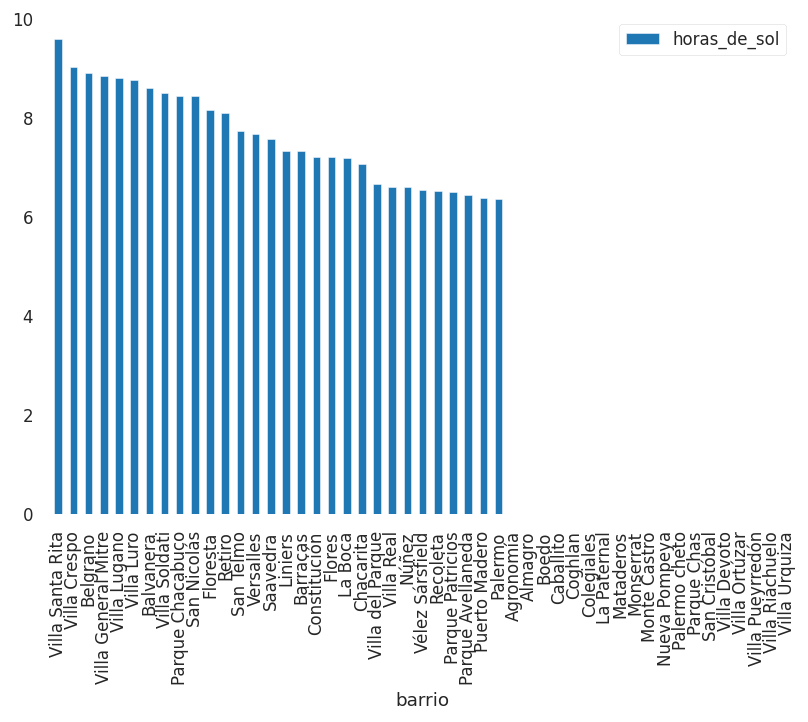

In [14]:
plt.rcParams["figure.dpi"] = 120

df[['barrio', 'horas_de_sol']].groupby('barrio').mean().sort_values(by = 'horas_de_sol', ascending=False).plot(kind = 'bar')

plt.show()

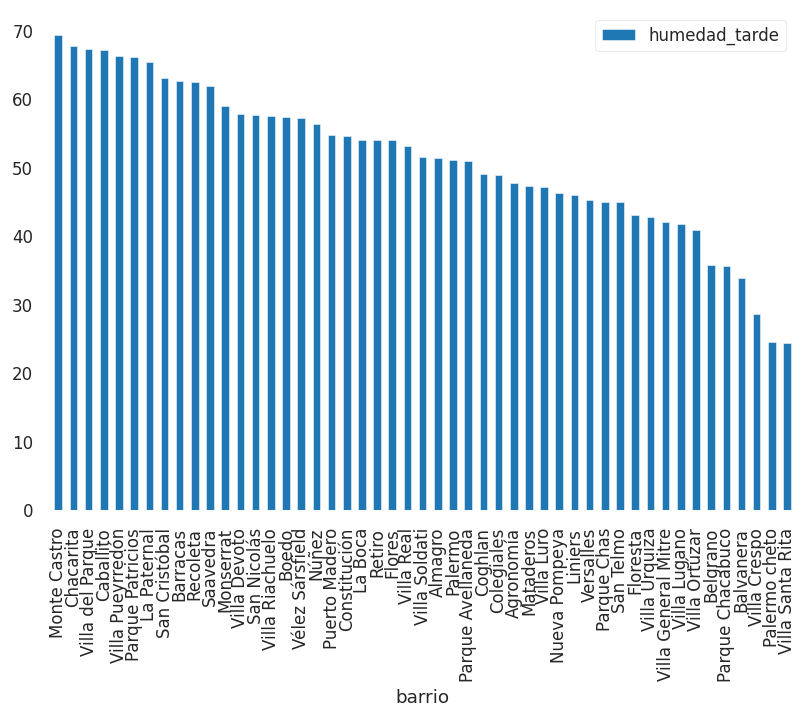

In [15]:
plt.rcParams["figure.dpi"] = 120

df[['barrio', 'humedad_tarde']].groupby('barrio').mean().sort_values(by = 'humedad_tarde', ascending=False).plot(kind = 'bar')

plt.show()

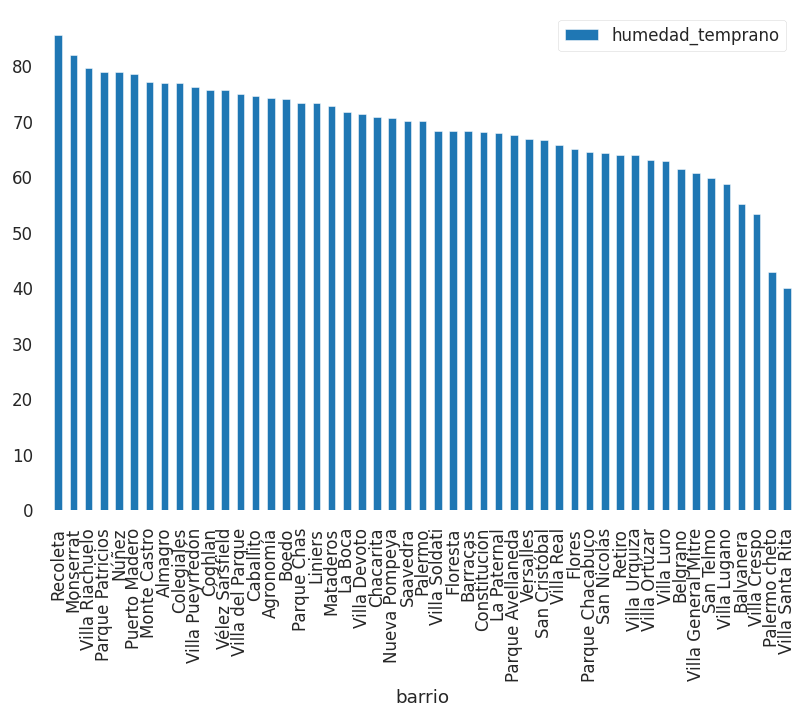

In [16]:
plt.rcParams["figure.dpi"] = 120

df[['barrio', 'humedad_temprano']].groupby('barrio').mean().sort_values(by = 'humedad_temprano', ascending=False).plot(kind = 'bar')

plt.show()

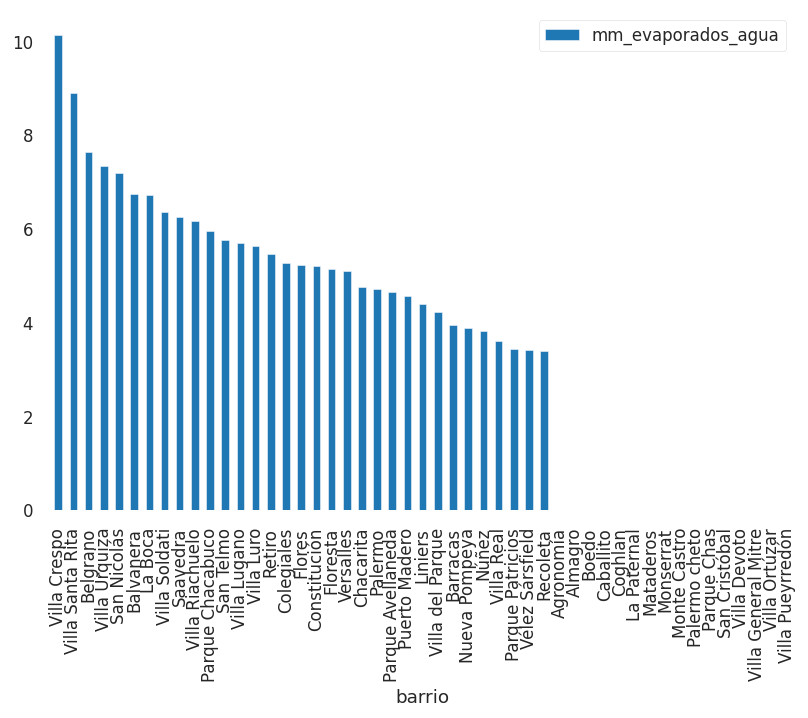

In [17]:
plt.rcParams["figure.dpi"] = 120

df[['barrio', 'mm_evaporados_agua']].groupby('barrio').mean().sort_values(by = 'mm_evaporados_agua', ascending=False).plot(kind = 'bar')

plt.show()

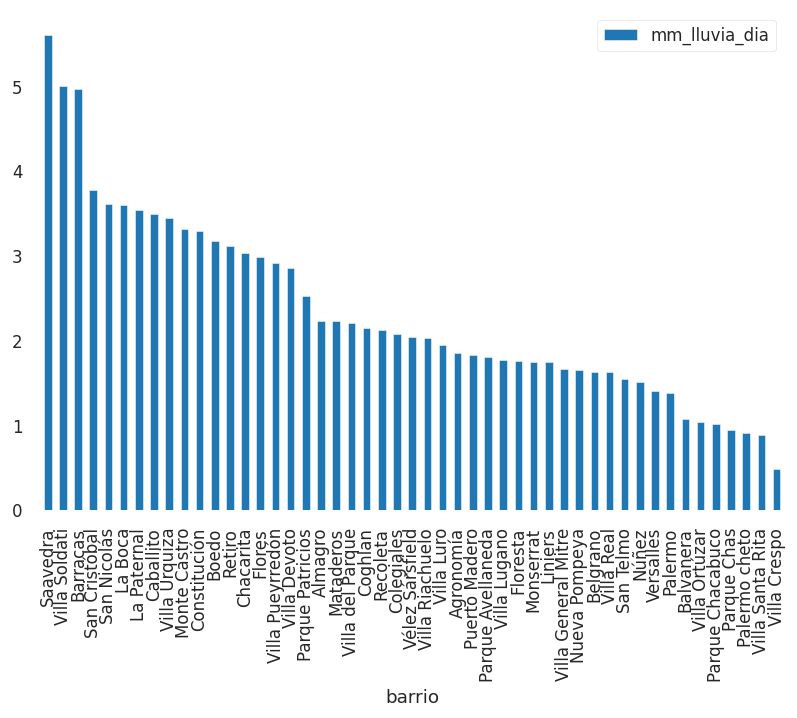

In [18]:
plt.rcParams["figure.dpi"] = 120

df[['barrio', 'mm_lluvia_dia']].groupby('barrio').mean().sort_values(by = 'mm_lluvia_dia', ascending=False).plot(kind = 'bar')

plt.show()

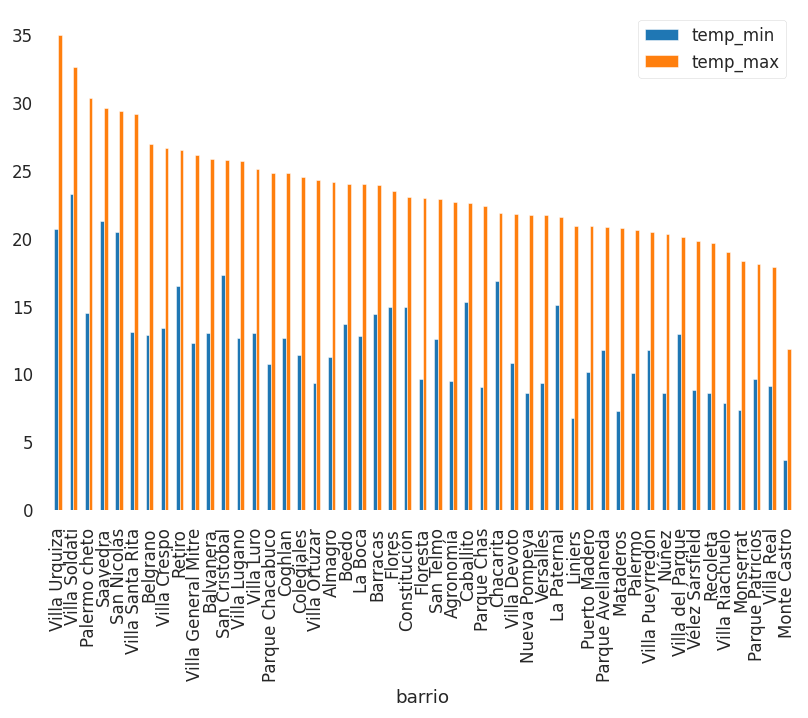

In [19]:
plt.rcParams["figure.dpi"] = 120

df[['barrio', 'temp_min', 'temp_max']].groupby('barrio').mean().sort_values(by = 'temp_max', ascending=False).plot(kind = 'bar')

plt.show()

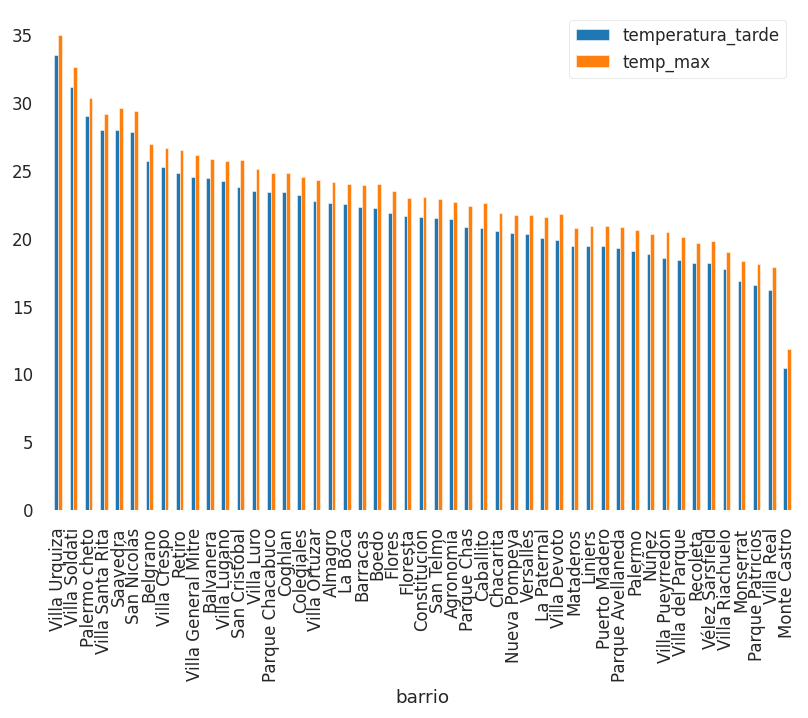

In [20]:
plt.rcParams["figure.dpi"] = 120

df[['barrio', 'temperatura_tarde', 'temp_max']].groupby('barrio').mean().sort_values(by = 'temperatura_tarde', ascending=False).plot(kind = 'bar')

plt.show()

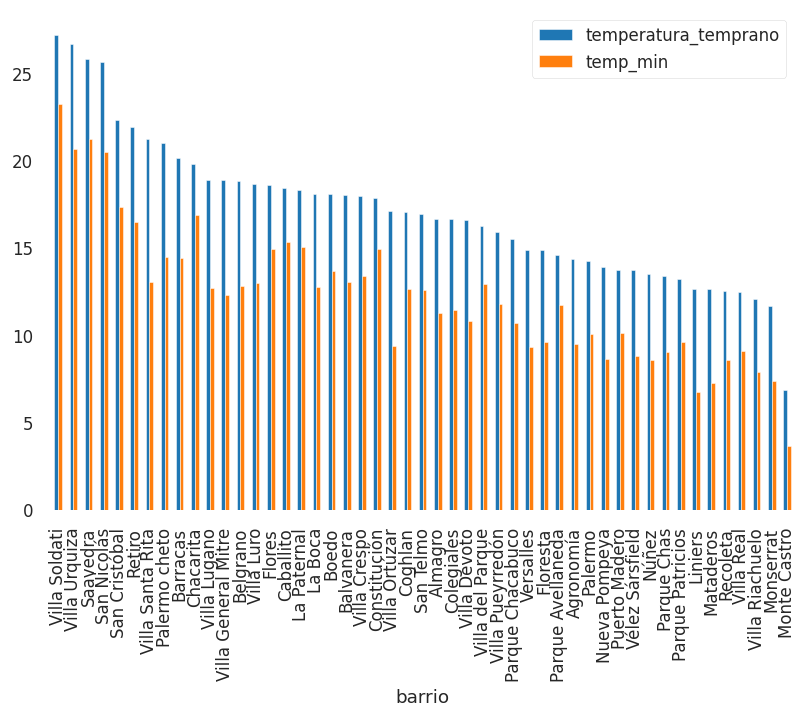

In [21]:
plt.rcParams["figure.dpi"] = 120

df[['barrio', 'temperatura_temprano', 'temp_min']].groupby('barrio').mean().sort_values(by = 'temperatura_temprano', ascending=False).plot(kind = 'bar')

plt.show()

<AxesSubplot:xlabel='temp_max', ylabel='temperatura_tarde'>

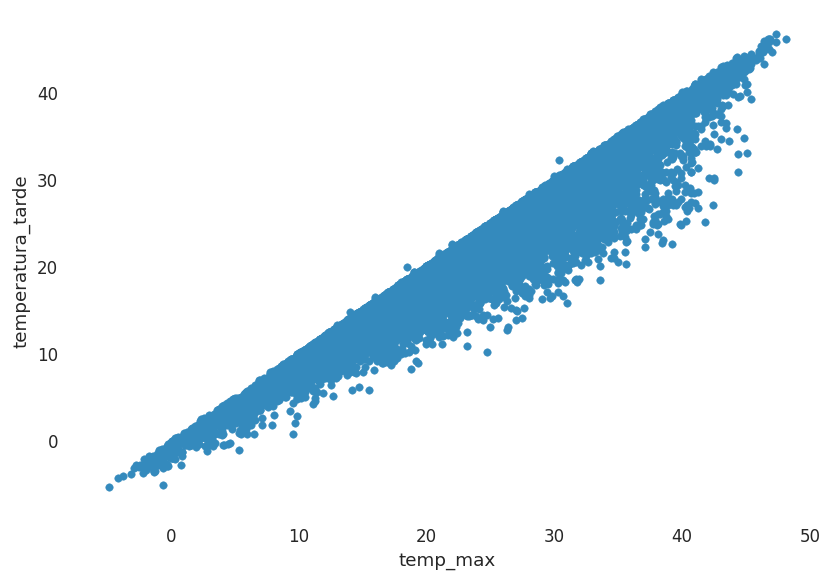

In [22]:
df.plot(
    x='temp_max',
    y='temperatura_tarde',
    kind='scatter',
)

<AxesSubplot:xlabel='temp_min', ylabel='temperatura_temprano'>

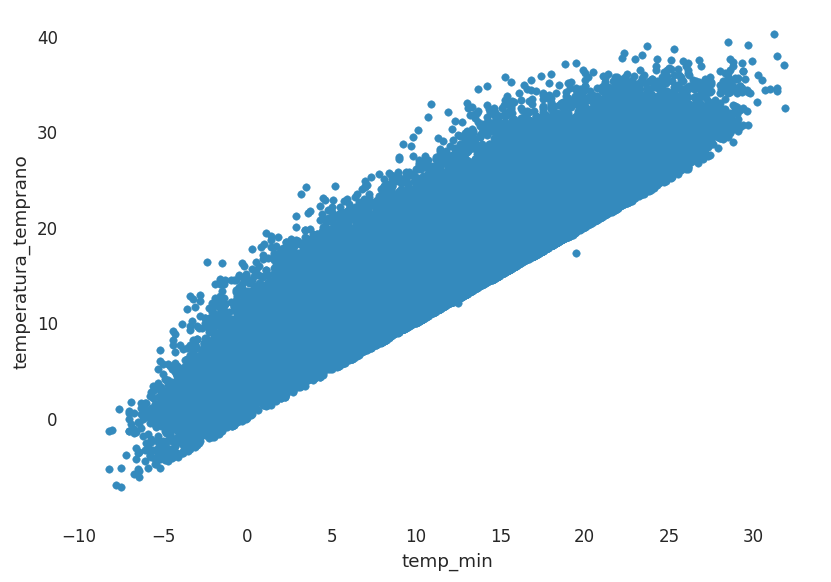

In [23]:
df.plot(
    x='temp_min',
    y='temperatura_temprano',
    kind='scatter',
)

<AxesSubplot:xlabel='temp_max', ylabel='temp_min'>

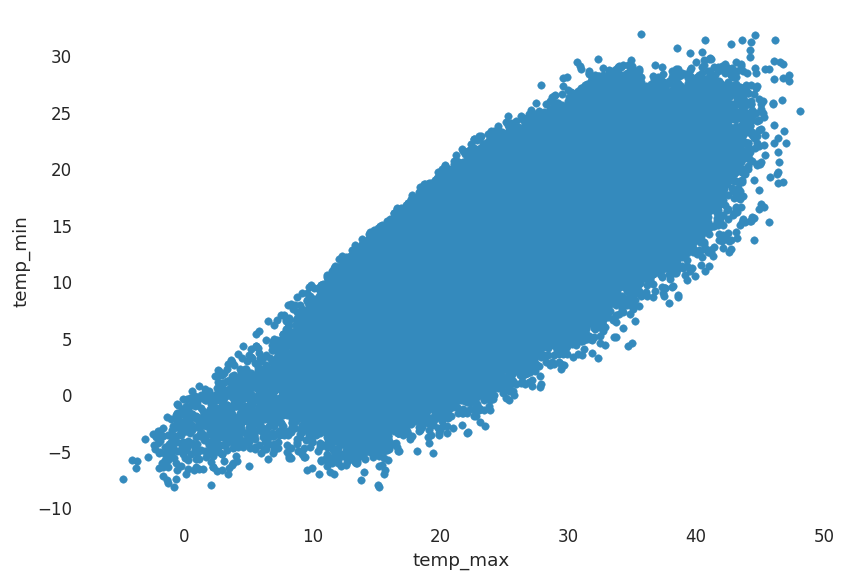

In [24]:
df.plot(
    x='temp_max',
    y='temp_min',
    kind='scatter',
)

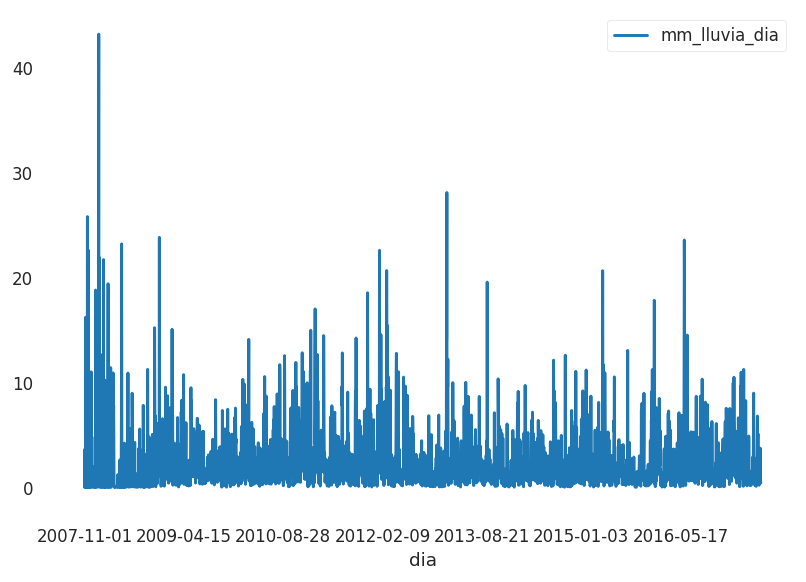

In [25]:
plt.rcParams["figure.dpi"] = 120

df[['dia', 'mm_lluvia_dia']].groupby('dia').mean().plot(kind='line')
plt.show()

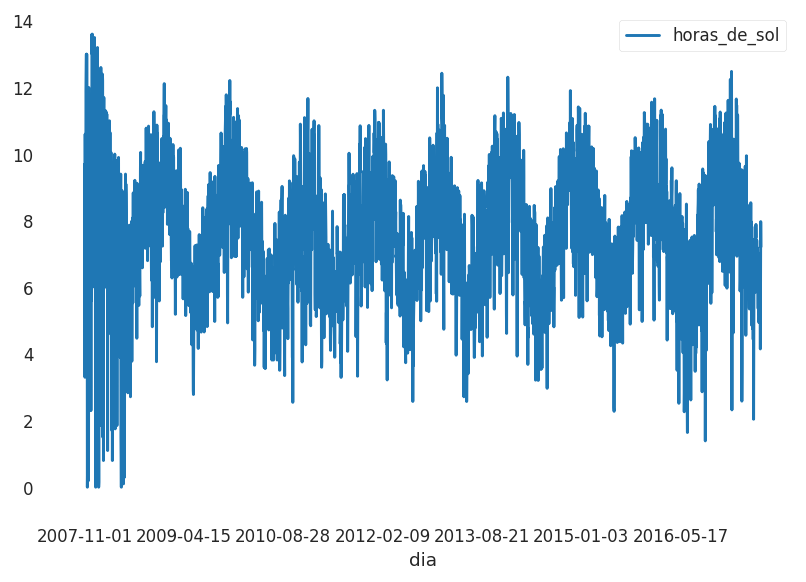

In [26]:
plt.rcParams["figure.dpi"] = 120

df[['dia', 'horas_de_sol']].groupby('dia').mean().plot(kind='line')
plt.show()

In [27]:
df_target_mean = df.groupby('llovieron_hamburguesas_al_dia_siguiente').mean().transpose().drop(['id', 'presion_atmosferica_temprano'])
df_target_mean_normalized = df_target_mean.div(df_target_mean.sum(axis=1), axis=0)
df_target_mean_normalized = df_target_mean_normalized.sort_values(by = 'si', ascending=False)

<AxesSubplot:>

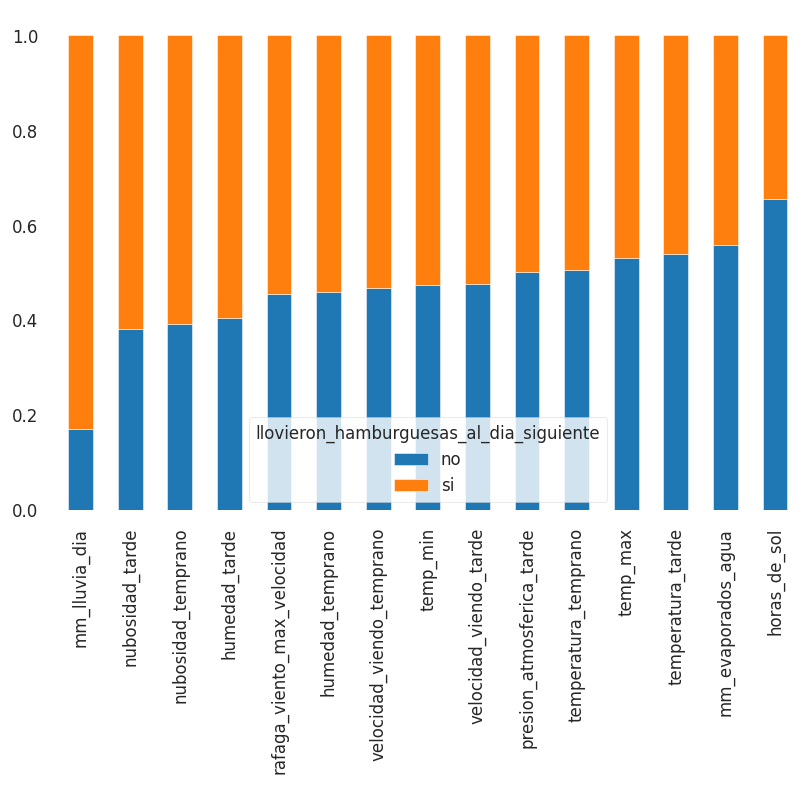

In [28]:
df_target_mean_normalized.plot(kind='bar', stacked=True)

<AxesSubplot:ylabel='Density'>

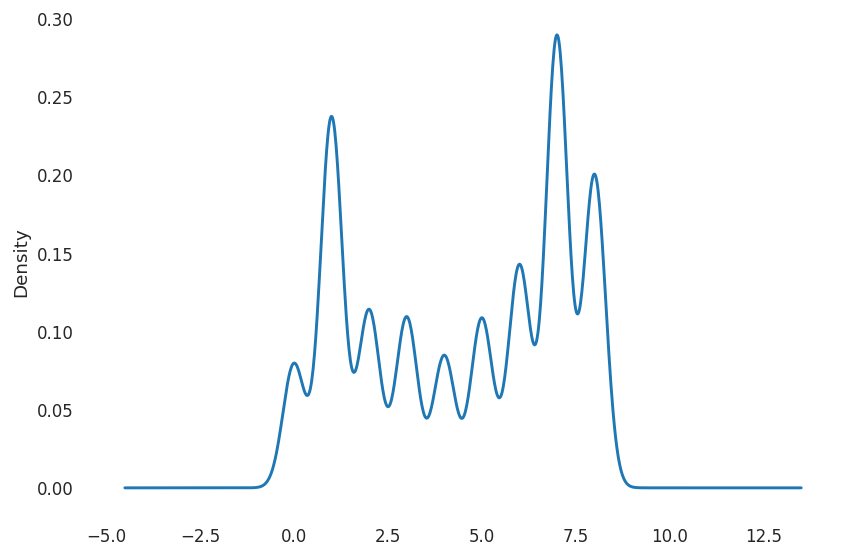

In [29]:
df['nubosidad_tarde'].plot(kind='density')

<AxesSubplot:>

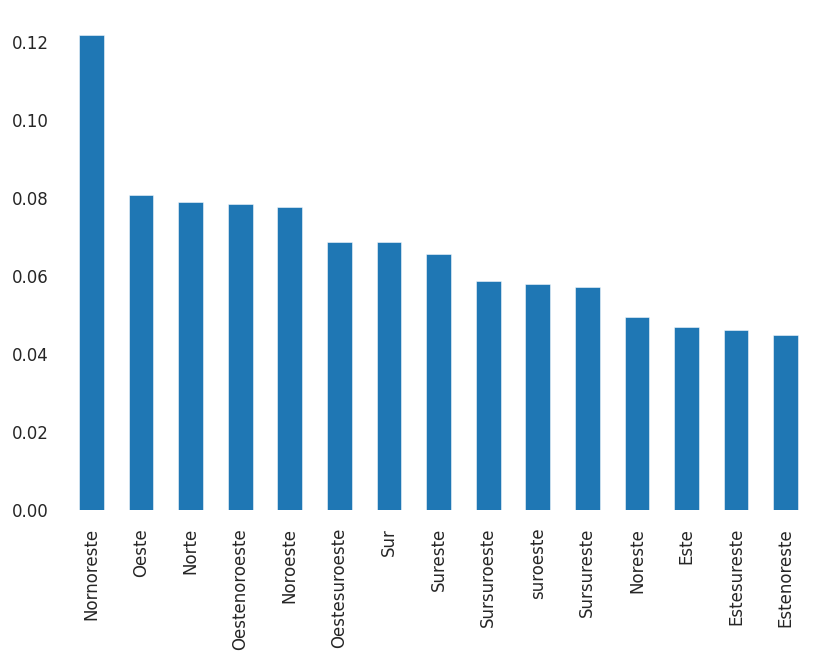

In [35]:
(df[df['llovieron_hamburguesas_al_dia_siguiente'] == 'si']['direccion_viento_tarde']).value_counts(normalize = True).sort_values(ascending=False).plot(kind='bar')



<AxesSubplot:ylabel='Density'>

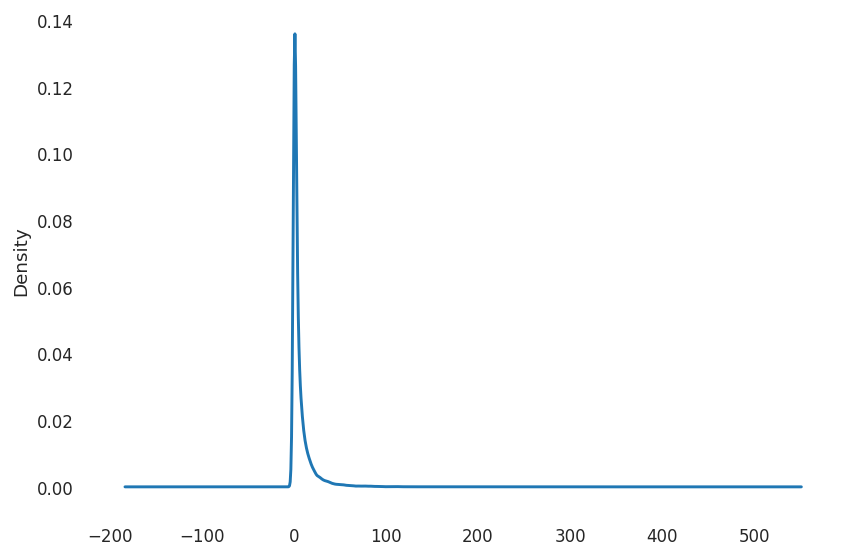

In [48]:
df[df['mm_lluvia_dia']>0]['mm_lluvia_dia'].plot(kind='density')

In [59]:
df.shape

(116368, 24)

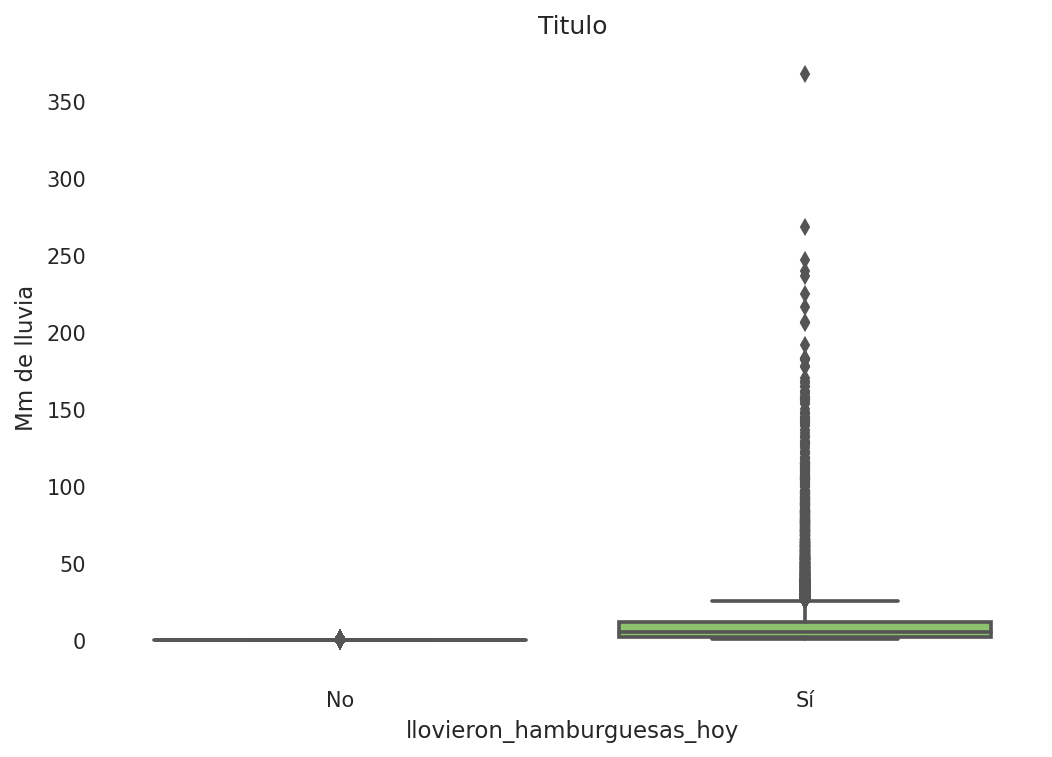

In [87]:
import seaborn as sns

plt.figure(dpi=150)
plt.title("Titulo")
sns.boxplot(
    data=df,
       
    y='mm_lluvia_dia',
    x='llovieron_hamburguesas_hoy',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Mm de lluvia")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

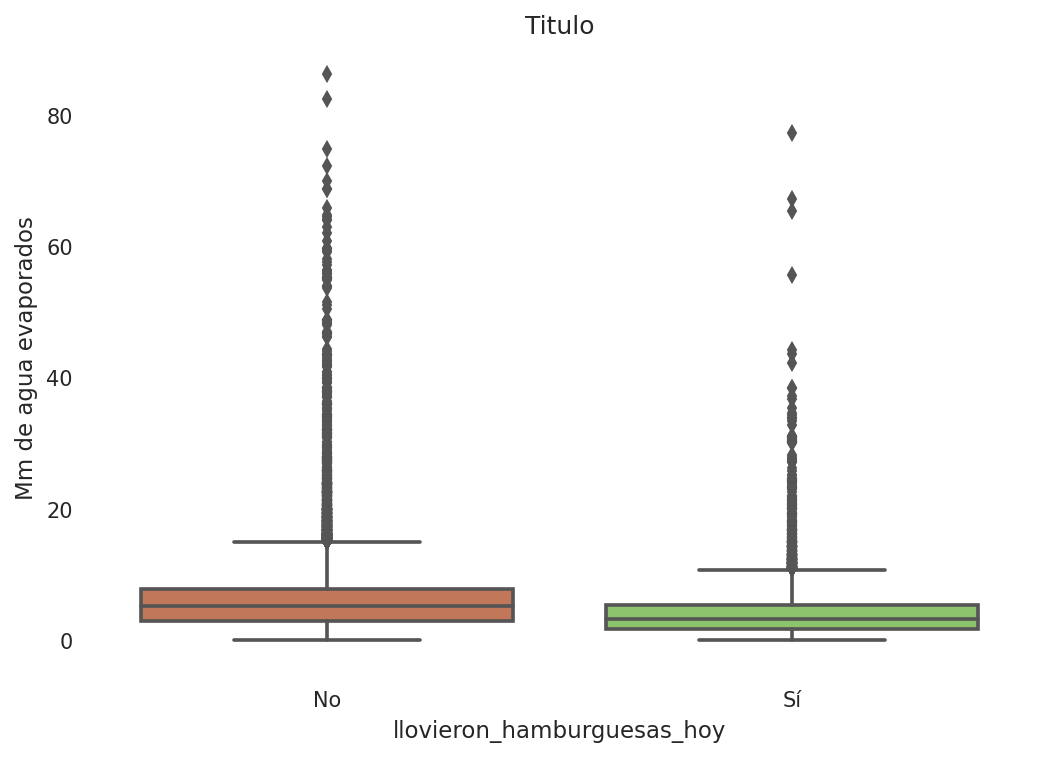

In [92]:
plt.figure(dpi=150)
plt.title("Titulo")
sns.boxplot(
    data=df,
       
    y='mm_evaporados_agua',
    x='llovieron_hamburguesas_hoy',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Mm de agua evaporados")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

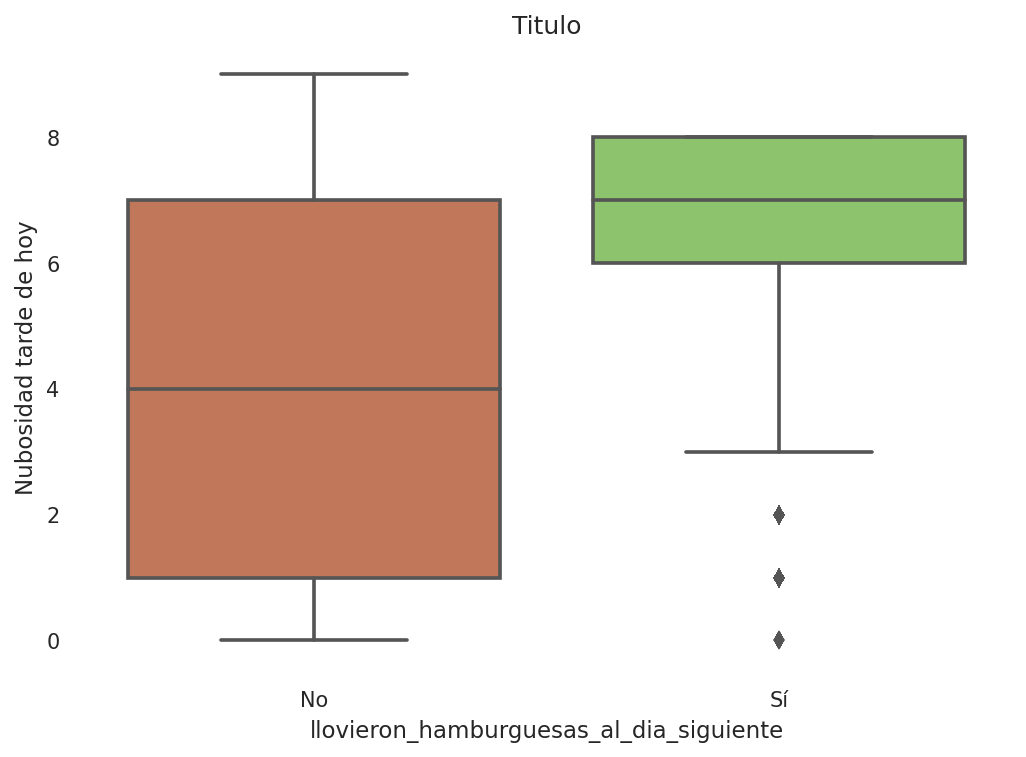

In [100]:
plt.figure(dpi=150)
plt.title("Titulo")
sns.boxplot(
    data=df,
       
    y='nubosidad_tarde',
    x='llovieron_hamburguesas_al_dia_siguiente',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Nubosidad tarde de hoy")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

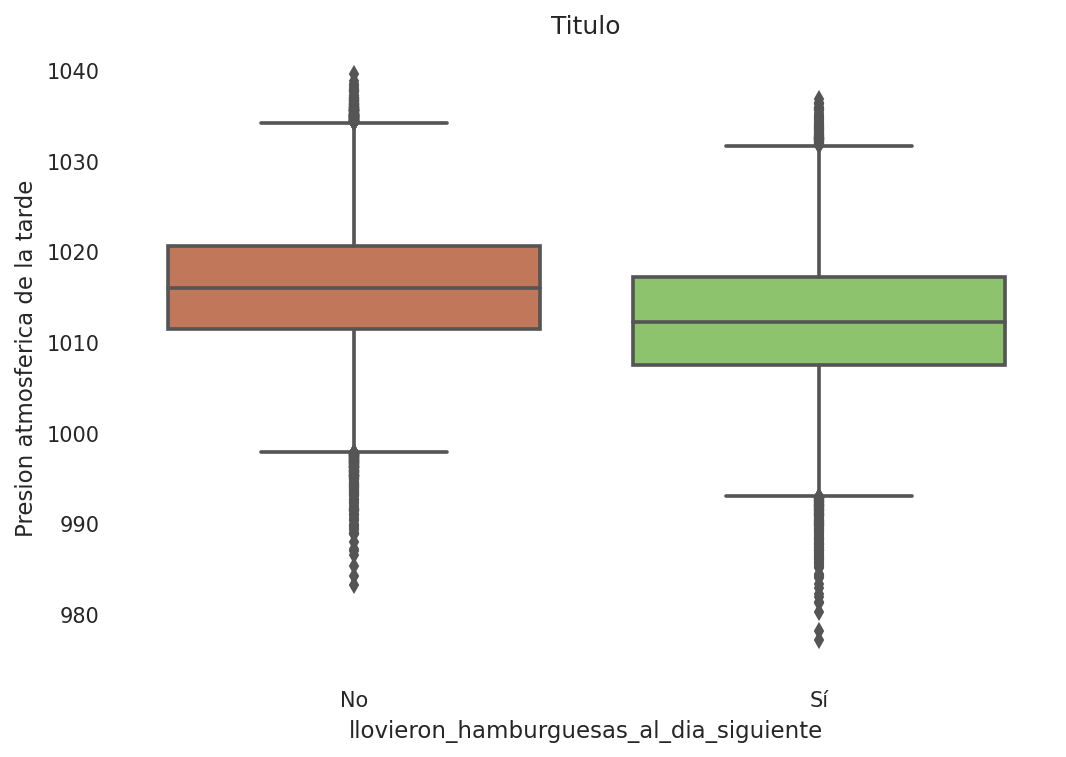

In [93]:
plt.figure(dpi=150)
plt.title("Titulo")
sns.boxplot(
    data=df,
       
    y='presion_atmosferica_tarde',
    x='llovieron_hamburguesas_al_dia_siguiente',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Presion atmosferica de la tarde")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

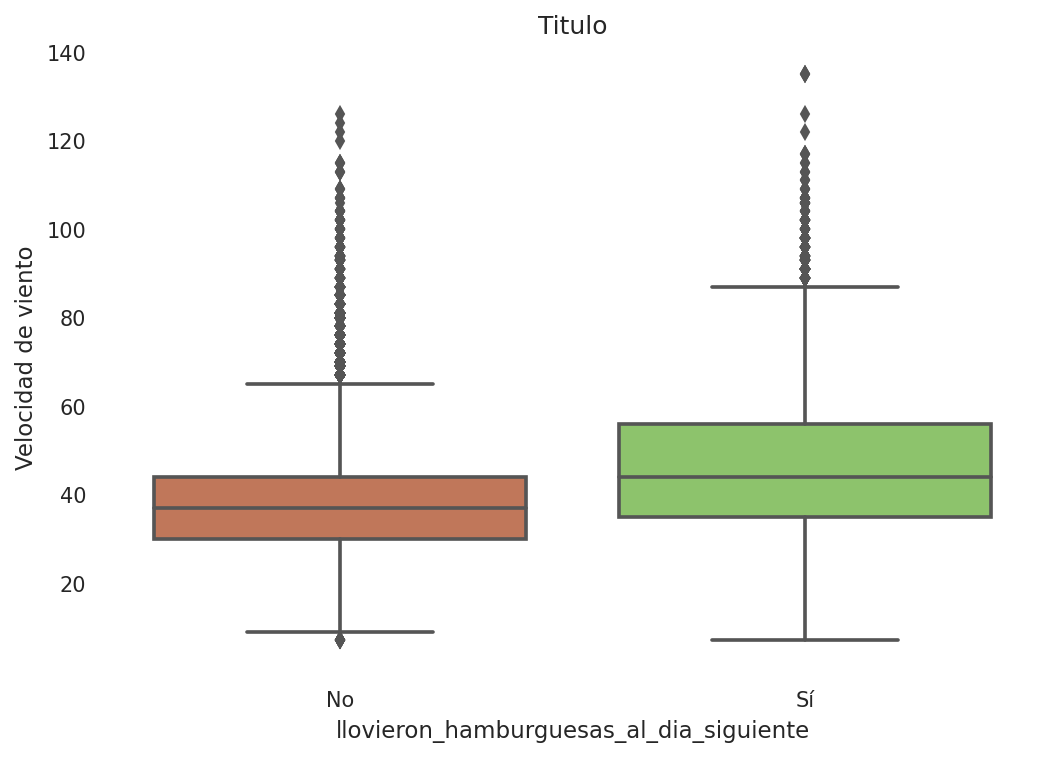

In [95]:
plt.figure(dpi=150)
plt.title("Titulo")
sns.boxplot(
    data=df,
       
    y='rafaga_viento_max_velocidad',
    x='llovieron_hamburguesas_al_dia_siguiente',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Velocidad de viento")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

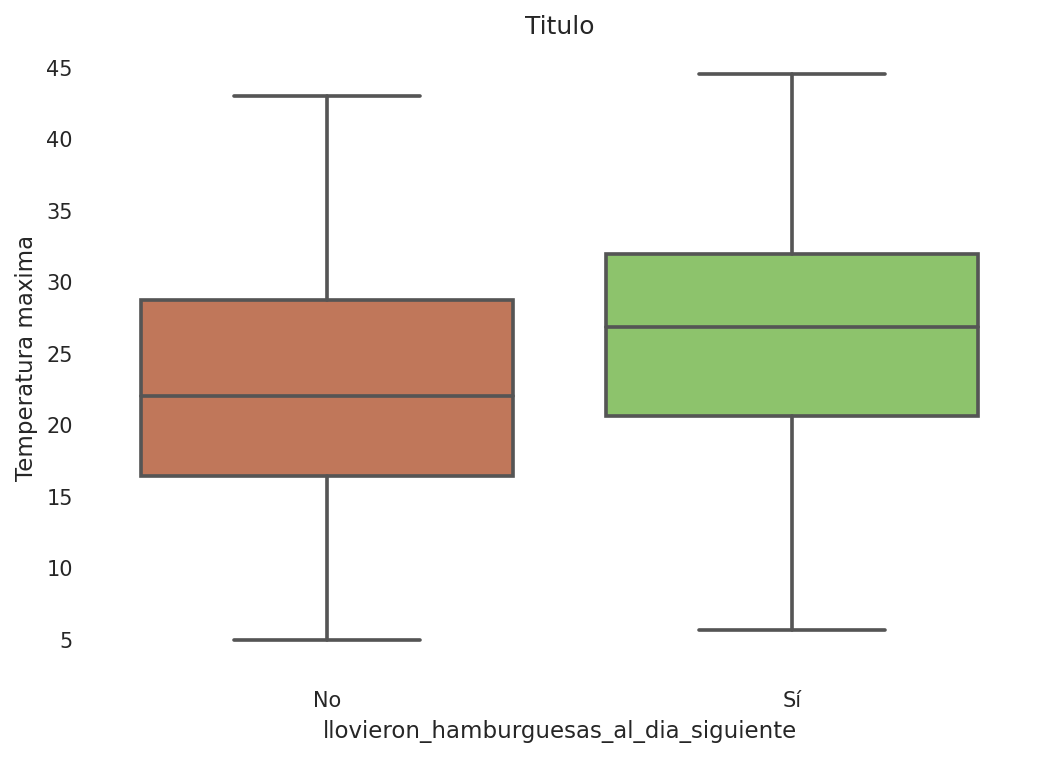

In [103]:
plt.figure(dpi=150)
plt.title("Titulo")
sns.boxplot(
    data=df[(df['presion_atmosferica_tarde']<1013) & (df['nubosidad_tarde'] > 6)],
       
    y='temp_max',
    x='llovieron_hamburguesas_al_dia_siguiente',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Temperatura maxima")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

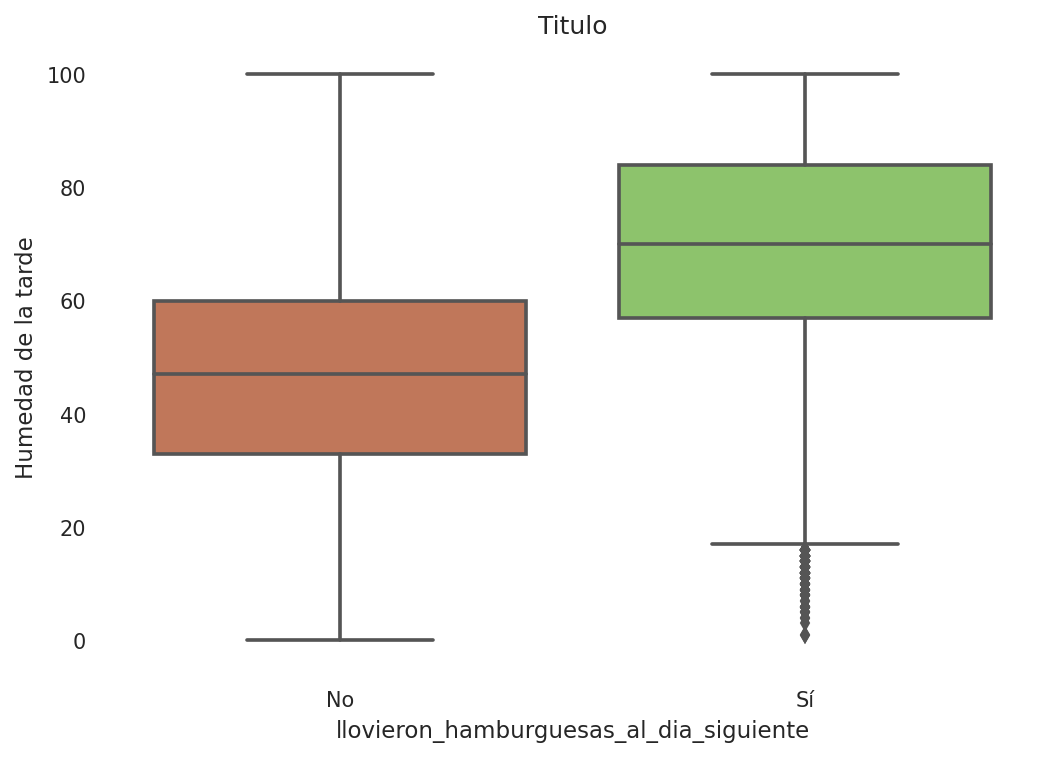

In [115]:
plt.figure(dpi=150)
plt.title("Titulo")
sns.boxplot(
    data=df,
    y='humedad_tarde',
    x='llovieron_hamburguesas_al_dia_siguiente',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Humedad de la tarde")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

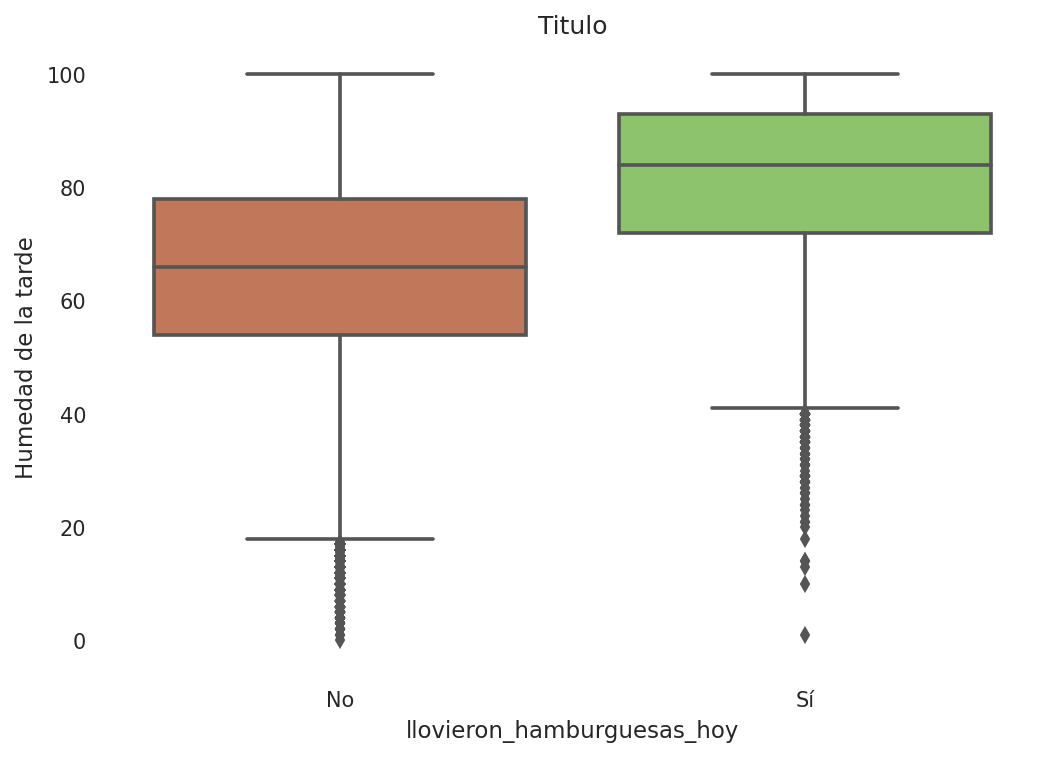

In [119]:
plt.figure(dpi=150)
plt.title("Titulo")
sns.boxplot(
    data=df,
    y='humedad_temprano',
    x='llovieron_hamburguesas_hoy',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Humedad temprana")
plt.xticks([False, True], ["No", "Sí"])
plt.show()